<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/CNN_AI_10_4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


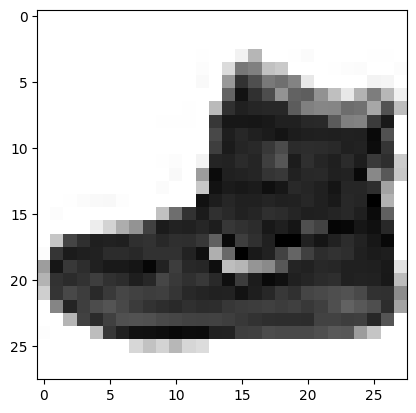

Cái này là:  9


In [ ]:
duty = x_train[0]   # Từ 0-60000 giá trị
plt.imshow(duty, cmap= plt.cm.binary)
plt.show()  
print('Cái này là: ', y_train[0])

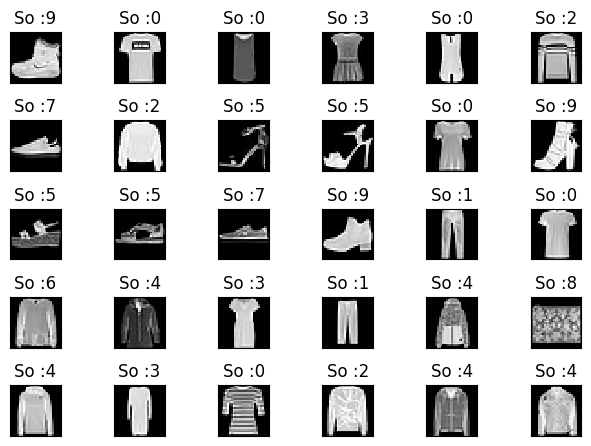

In [ ]:
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train = x_train.reshape((60000,28,28,1))  # Chuyển giá trị về 1 kênh kích thước 28 * 28
x_train = x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32')/255
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical (y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras import Input
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epochs = 20
classes = 10

In [ ]:
#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(28,28,1),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))

In [ ]:
# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

In [ ]:
# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

In [ ]:
# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))

In [ ]:
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy
model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
train = model.fit(x_train, y_train, batch_size,epochs=epochs,verbose = 1)

Epoch 1/20
938/938 [==============================] - 14s 4ms/step - loss: 0.4431 - accuracy: 0.8385
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2759 - accuracy: 0.8979
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2286 - accuracy: 0.9160
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1970 - accuracy: 0.9271
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1741 - accuracy: 0.9346
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1507 - accuracy: 0.9443
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1307 - accuracy: 0.9515
Epoch 8/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1115 - accuracy: 0.9578
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0942 - accuracy: 0.9647
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0801 - accuracy: 0.970

In [ ]:
model.save('CNN_AI_10_4.h5')